# TD1: Temporal Discretization
*Prepared by Bruno Régaldo-Saint Blancard*

With temporal discretization methods we can numerically solve Cauchy problems such as:
$$
    \begin{cases}
        u^\prime = f(u)\\
        u(0) = u_0
    \end{cases}
$$
where $u$ is typically a function $u : \mathbb{R} \rightarrow \mathbb{R}^d$ with $d$ the dimension of the problem (for $d = 2$ we may also find $u : \mathbb{R} \rightarrow \mathbb{C}$).
In this first TD we will review some of the basic methods to solve Ordinary Differential Equations (ODEs) before studying one of the most famous chaotic dynamical system: the Lorenz system.

## Part 1: The Exponential system

We want to study in this part several linear one-stage methods to solve the following system on $[0,T]$:
$$\begin{cases}
    u^\prime=\alpha u \\
    u (0) = u_0
\end{cases}
$$
with $u : [0,T] \rightarrow \mathbb{C}$, $\alpha \in \mathbb{C}$ and $u_0 \in \mathbb{C}$.
We discretize the interval $[0, T]$ into $N + 1$ equally spaced points $\{0, \Delta t, ..., N \Delta t\}$ defining the time step $\Delta t$ as $\Delta t = \frac{T}{N}$. The solution of this Cauchy problem is analytical and we will note $u(t) = u_0 e^{\alpha t}$ its unique solution.

We will make a clear distinction between the exact solution $u$ and its numerical approximations $u_{\text{num},*}$ where the * character refers to the selected numerical scheme.

More precisely, $u_{\text{num},*} = (u_{\text{num},*}^{(n)})_{n\in\{ 0 ,..., N\}}$ will be a finite sequence of N + 1 (potentially complex) numbers such that $u_{\text{num},*}^{(n)}$ approximates the value of the exact solution $u (n \Delta t)$.

In the following, Python codes will only need *numpy* and *matplotlib* packages.

In [1]:
# To draw matplotlib plots within this notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

We will also use the following parameters:

In [2]:
T = 10.0
N = 100
dt = T / N

**1) Forwards Euler:** We recall that Forwards Euler method (FE) is a first order method which computes the value of $u (t + \Delta t)$ given $u(t)$ using the following Taylor expansion:
$$
    u (t + \Delta t) = u(t) + \Delta t~f (u(t)) + \mathcal{O}(\Delta t ^2)
$$
Express $u_{\text{num},\text{FE}}^{(n + 1)}$ as a function of $u_{\text{num},\text{FE}}^{(n)}$. This relation is the reccurence relation of Forwards Euler method.

Then, what is the expression of $u_{\text{num},\text{FE}}^{(n)}$ as a function of $u_{\text{num},\text{FE}}^{(0)} = u_0$?

<span style="color:red">**Answer:**<br/><br/>
$u_{\text{num},\text{FE}}^{(n + 1)} = (1 + \alpha \Delta t) u_{\text{num},\text{FE}}^{(n)}$
$\Longrightarrow u_{\text{num},\text{FE}}^{(n)} = (1 + \alpha \Delta t)^n u_0$
</span>

**2)** We define $q = \alpha \Delta t$ and pick $u_0 = 1$. Program a Forwards Euler based solving method (using the recurrence relation) of the exponential system on $[0,T]$ and plot the numerical solution and the exact solution for several real values of $q$ (both positive and negative values). Can you observe some numerical instabilities?

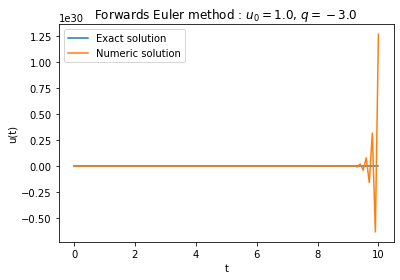

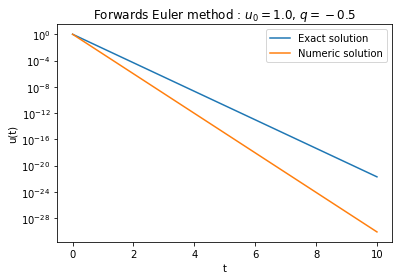

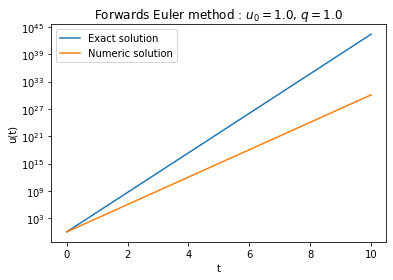

In [3]:
def exp_FE(u0, q):
    t = np.arange(0, T + dt, dt)
    u_exact = u0 * np.exp(q / dt * t)
    u_FE = np.zeros(N + 1)
    u_FE[0] = u0
    
    for i in range(1, N + 1):
        u_FE[i] = (1 + q) * u_FE[i - 1]
    
    return t, u_exact, u_FE

def plot_sol(t, u_exact, u_FE, title="", logscale=True):
    plt.figure()
    plt.plot(t, u_exact, label='Exact solution')
    plt.plot(t, u_FE, label='Numeric solution')
    plt.title(title)
    plt.xlabel('t')
    plt.ylabel('u(t)')
    if logscale:
        plt.yscale('log')
    plt.legend()
    plt.show()
    
# With q = -3.0, Forwards Euler method is unstable.
t, u_exact, u_FE = exp_FE(1.0, -3.0)
plot_sol(t, u_exact, u_FE, "Forwards Euler method : $u_0 = 1.0$, $q = -3.0$", False)

# With q = -0.5, we are in the region of absolute stability.
t, u_exact, u_FE = exp_FE(1.0, -0.5)
plot_sol(t, u_exact, u_FE, "Forwards Euler method : $u_0 = 1.0$, $q = -0.5$")

# With q = 1.0, the numeric solution is not satisfactory.
t, u_exact, u_FE = exp_FE(1.0, 1.0)
plot_sol(t, u_exact, u_FE, "Forwards Euler method : $u_0 = 1.0$, $q = 1.0$")

**3) Backwards Euler / Crank-Nicolson:** Same questions for Backwards Euler method and Crank-Nicolson method. We recall that Backwards Euler method relies on the following expansion:
$$
    u (t + \Delta t) = u(t) + \Delta t~f(u(t + \Delta t)) + \mathcal{O}(\Delta t ^2)
$$
and that Crank-Nicolson relies on the following expansion:
$$
    u (t + \Delta t) = u(t) + \frac{\Delta t}{2}\left(f\left(u\left(t\right)\right) + f\left(u\left(t + \Delta t\right)\right)\right) + \mathcal{O}(\Delta t ^3)
$$

<span style="color:red">**Answer:**<br/><br/>
$u_{\text{num},\text{BE}}^{(n + 1)} = \frac1{1 - \alpha \Delta t} u_{\text{num},\text{BE}}^{(n)}$
$\Longrightarrow u_{\text{num},\text{BE}}^{(n)} = (1 - \alpha \Delta t)^{-n} u_0$
<br/><br/>  
$u_{\text{num},\text{CN}}^{(n + 1)} = \frac{1 + \frac{\alpha \Delta t}{2}}{1 - \frac{\alpha \Delta t}{2}} u_{\text{num},\text{CN}}^{(n)}$
$\Longrightarrow u_{\text{num},\text{CN}}^{(n)} = \left(\frac{1 + \frac{\alpha \Delta t}{2}}{1 - \frac{\alpha \Delta t}{2}}\right)^{n} u_0$
</span>

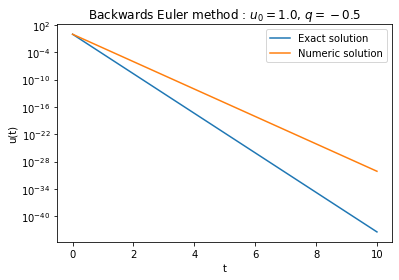

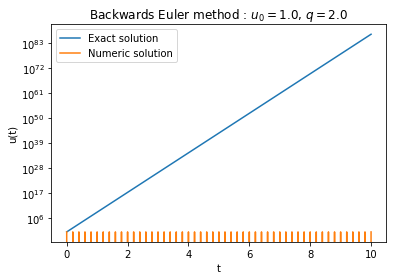

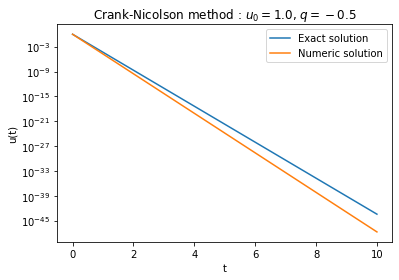

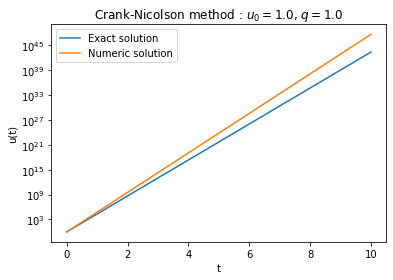

In [4]:
def exp_BE(u0, q):
    t = np.arange(0, T + dt, dt)
    u_exact = u0 * np.exp(q / dt * t)
    u_BE = np.zeros(N + 1)
    u_BE[0] = u0
    
    for i in range(1, N + 1):
        u_BE[i] = u_BE[i - 1] * 1 / (1 - q)
    
    return t, u_exact, u_BE

def exp_CN(u0, q):
    t = np.arange(0, T + dt, dt)
    u_exact = u0 * np.exp(q / dt * t)
    u_CN = np.zeros(N + 1)
    u_CN[0] = u0
    
    for i in range(1, N + 1):
        u_CN[i] = u_CN[i - 1] * (1 + q / 2) / (1 - q / 2)
    
    return t, u_exact, u_CN

##### Backwards Euler #####

# With q = -0.5, we are in the region of absolute stability.
t, u_exact, u_BE = exp_BE(1.0, -1.0)
plot_sol(t, u_exact, u_BE, "Backwards Euler method : $u_0 = 1.0$, $q = -0.5$")

# With q = 2.0, the numeric solution is irrelevant, it oscillates between u_0 and -u_0.
t, u_exact, u_BE = exp_BE(1.0, 2.0)
plot_sol(t, u_exact, u_BE, "Backwards Euler method : $u_0 = 1.0$, $q = 2.0$")

##### Crank-Nicolson #####

# With q = -0.5, we are in the region of absolute stability.
t, u_exact, u_CN = exp_CN(1.0, -1.0)
plot_sol(t, u_exact, u_CN, "Crank-Nicolson method : $u_0 = 1.0$, $q = -0.5$")

# With q = 1.0, the numeric solution is not satisfactory for long time.
t, u_exact, u_CN = exp_CN(1.0, 1.0)
plot_sol(t, u_exact, u_CN, "Crank-Nicolson method : $u_0 = 1.0$, $q = 1.0$")

**4)** Compare on this example the three previous methods by plotting the three numerical solutions next to the exact solution. We will use a value of $q$ which is included in the absolute stability region of every method.

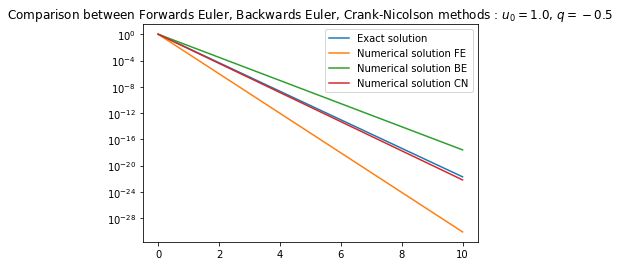

In [5]:
t, u_exact, u_BE = exp_BE(1.0, -0.5)
t, u_exact, u_FE = exp_FE(1.0, -0.5)
t, u_exact, u_CN = exp_CN(1.0, -0.5)

plt.figure()
plt.plot(t, u_exact, label="Exact solution")
plt.plot(t, u_FE, label="Numerical solution FE")
plt.plot(t, u_BE, label="Numerical solution BE")
plt.plot(t, u_CN, label="Numerical solution CN")
plt.title("Comparison between Forwards Euler, Backwards Euler, Crank-Nicolson methods : $u_0 = 1.0$, $q = -0.5$")
plt.yscale('log')
plt.legend()
plt.show()

# We see that CN is much more accurate on this example, it is indeed a second-order method while FE and BE are first-order methods.

**5)** Show theoretically that Crank-Nicolson scheme is a second-order method.

<span style="color:red">**Answer:**<br/><br/>
We need to develop the following expression:<br/><br/>
$\begin{align}
u(t) + \frac{\Delta t}{2}\left(f\left(u\left(t\right)\right) + f\left(u\left(t + \Delta t\right)\right)\right) &= u(t) + \frac{\Delta t}{2}\left(f(u(t)) + f(u(t) + u^\prime(t)\Delta t + \mathcal{O}(\Delta t^2))\right)\\
&= u (t) + \frac{\Delta t}{2}\left( f(u(t)) + f(u(t)) + f^\prime(u(t))u^\prime(t)\Delta t + \mathcal{O}(\Delta t^2)\right)\\
&= u(t) + \Delta t~f (u(t)) + \frac{\Delta t^2}{2} f^\prime(u(t))f(u(t)) + \mathcal{O}(\Delta t^3)
\end{align}$<br/><br/>
This expression matches the second order Taylor series: Crank-Nicolson scheme is a second-order method.
</span>

## Part 2: The Harmonic Oscillator

We now want to solve the following Cauchy problem on $[0,T]$:
$$\begin{cases}
    u^{\prime\prime} +\omega^2 u =0\\
    u(0) = u_0\\
    u^\prime(0) = u^\prime_0
\end{cases}
$$
where $u : [0,T] \rightarrow \mathbb{R}$, $\omega\in\mathbb{R}$, $u_0 \in \mathbb{R}$ and $u^\prime_0 \in \mathbb{R}$.

**1)** Introducing $v = \frac{u^\prime}{\omega}$, show that this sytem is equivalent to a complex exponential system such as defined in the previous part. We will express $\alpha$ in terms of $\omega$.

<span style="color:red">**Answer:**<br/><br/>
With $w = u + iv$ we have:
$$
    w^\prime=-i\omega w
$$
Then $\alpha = -i\omega$.
</span>

**2)** Solve numerically this system for $\omega = 1$ using Forwards Euler method, Backwards Euler method, Crank-Nicolson method.

In [6]:
# We need to make a slight change in our previous functions to handle complex numbers

def exp_FE(u0, q, dtype=float):
    t = np.arange(0, T + dt, dt)
    u_exact = u0 * np.exp(q / dt * t)
    u_FE = np.zeros(N + 1, dtype=dtype)
    u_FE[0] = u0
    
    for i in range(1, N + 1):
        u_FE[i] = (1 + q) * u_FE[i - 1]
    
    return t, u_exact, u_FE

def exp_BE(u0, q, dtype=float):
    t = np.arange(0, T + dt, dt)
    u_exact = u0 * np.exp(q / dt * t)
    u_BE = np.zeros(N + 1, dtype=dtype)
    u_BE[0] = u0
    
    for i in range(1, N + 1):
        u_BE[i] = u_BE[i - 1] * 1 / (1 - q)
    
    return t, u_exact, u_BE

def exp_CN(u0, q, dtype=float):
    t = np.arange(0, T + dt, dt)
    u_exact = u0 * np.exp(q / dt * t)
    u_CN = np.zeros(N + 1, dtype=dtype)
    u_CN[0] = u0
    
    for i in range(1, N + 1):
        u_CN[i] = u_CN[i - 1] * (1 + q / 2) / (1 - q / 2)
    
    return t, u_exact, u_CN

# Now we can solve the harmonic oscillator problem using what has been done in part one

omega = 1.0
q = -1j * omega * dt
w0 = 1.0 + 1.0j

t, u_exact, u_FE = exp_FE(w0, q, complex)
t, u_exact, u_BE = exp_BE(w0, q, complex)
t, u_exact, u_CN = exp_CN(w0, q, complex)

**3)** Plot the previous numerical solutions in the $(u, v)$ plan. If we want to enforce energy conservation in this system, which numerical method should we use? Explain theoretically what we observe following the selected numerical method.

<span style="color:red">**Answer:**<br/><br/>
Along a trajectory, energy conservation gives $|w|^2 = v^2 + u^2 = v_0^2 + u_0^2 = |w_0|^2$. The phase portrait of the exact solution is therefore a circle in the $(u,v)$ plan.<br/><br/>
Using the recurrence relations of the first part we see that:
* <span style="color:red">for Forwards Euler method: $|w_{\text{num}, \text{FE}}^{(n+1)}|^2 > |w_{\text{num}, \text{FE}}^{(n)}|^2 ~\rightarrow~$ the energy increases with time with this method</span>
* <span style="color:red">for Backwards Euler method: $|w_{\text{num}, \text{BE}}^{(n+1)}|^2 < |w_{\text{num}, \text{BE}}^{(n)}|^2 ~\rightarrow~$ the energy decreases with time with this method</span>
* <span style="color:red">for Crank-Nicolson method: $|w_{\text{num}, \text{CN}}^{(n+1)}|^2 = |w_{\text{num}, \text{CN}}^{(n)}|^2 ~\rightarrow~$ the energy is constant with time with this method</span>
</span>

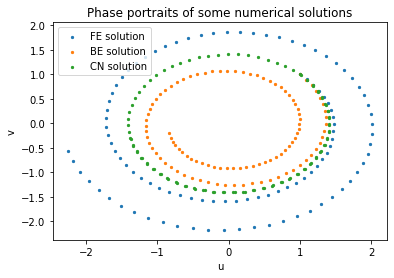

In [7]:
plt.figure()
plt.scatter(np.real(u_FE), np.imag(u_FE), 5, label="FE solution")
plt.scatter(np.real(u_BE), np.imag(u_BE), 5, label="BE solution")
plt.scatter(np.real(u_CN), np.imag(u_CN), 5, label="CN solution")
plt.title("Phase portraits of some numerical solutions")
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.show()

## Part 3: A chaotic dynamical system: the Lorenz system

We are now interested in the Lorenz system, first studied by the mathematician and meteorologist Edward Lorenz to model the atmospheric convection (we will refer to the following [Wikipedia page](https://en.wikipedia.org/wiki/Lorenz_system)). The Lorenz system is defined as follows:
$$\begin{cases}
x^\prime = \sigma(y - x)\\
y^\prime = x (\rho - z) - y\\
z^\prime = xy - \beta z
\end{cases}
$$
where $x, y, z : \mathbb{R} \rightarrow \mathbb{R}$ and $\sigma, \rho, \beta \in \mathbb{R}$ are some numerical parameters. Lorenz first used the following values of the parameters:

In [8]:
rho = 28.0
sigma = 10.0
beta = 8/3

We want to solve the Lorenz system using Runge-Kutta multistage methods. We will call RK2, the following Runge-Kutta method:
$$
    U_1 = u(t)\\
    U_2 = u(t) + \Delta t~f(U_1)\\
    u(t + \Delta t) = u(t) + \frac{\Delta t}{2}(f(U_1) + f(U_2)) + \mathcal{O}(\Delta t^3)
$$

**1)** Show theoretically that RK2 is a second-order method.

<span style="color:red">**Answer:**<br/><br/>
$\begin{align}
u(t) + \frac{\Delta t}{2}\left(f\left(u\left(t\right)\right) + f\left(u\left(t\right)+\Delta t~f\left(u\left(t\right)\right)\right)\right) &= u (t) + \frac{\Delta t}{2}\left( f(u(t)) + f(u(t)) + f^\prime(u(t))\Delta t~f(u(t)) + \mathcal{O}(\Delta t^2)\right)\\
&= u(t) + \Delta t~f (u(t)) + \frac{\Delta t^2}{2} f^\prime(u(t))f(u(t)) + \mathcal{O}(\Delta t^3)
\end{align}$<br/><br/>
This expression matches the second order Taylor series: RK2 is a second-order method.
</span>

**2)** Solve numerically the Lorenz system on the interval $[0,T]$ using RK2 method with the following initial values: $x (0) = y (0) = z (0) = 1$. We will use at least $T = 100$ and $N = 10000$.

In [9]:
T = 100.0
N = 10000
dt = T / N

def f_lorenz(u):
    ret = np.zeros(3)
    ret[0] = sigma * (u[1] - u[0])
    ret[1] = u[0] * (rho - u[2]) - u[1]
    ret[2] = u[0] * u[1] - beta * u[2]
    return ret

def RK2(u0, f):
    u = np.zeros((N + 1, len(u0)))
    u[0, :] = u0
    u_curr = u[0, :]
    
    for i in range(0, N):
        U1 = u_curr
        U2 = u_curr + dt * f(U1)
        u[i + 1, :] = U1 + dt / 2 * (f(U1) + f(U2))
        u_curr = u[i + 1, :]
        
    return u

u0 = [1.0, 1.0, 1.0]

u = RK2(u0, f_lorenz)

**3)** Plot the solution in the 3D-space $(x,y,z)$. We can use *[mpl_toolkits.mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)* package for 3D plots.

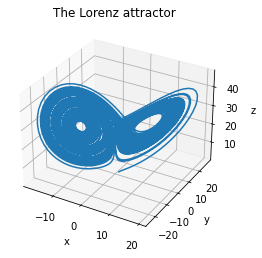

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(u[:, 0], u[:, 1], u[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("The Lorenz attractor ")
plt.show()

We call this figure the *Lorenz attractor*.
The Lorenz system exhibits chaotic behaviors for some specific values of its parameters: this means that solutions are highly senstive to initial conditions.

**4)** For the same values of the parameters, slightly change the initial conditions and observe this chaotic behavior.

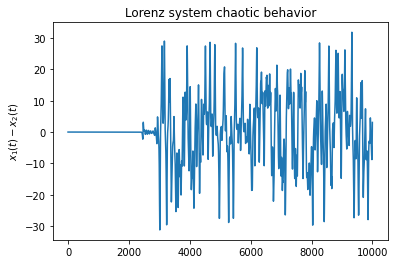

In [11]:
# We plot the difference of two solutions with almost similar initial conditions.

u1 = RK2([1.0, 1.0, 1.0], f_lorenz)
u2 = RK2([1.000001, 1.0, 1.0], f_lorenz)

plt.figure()
plt.plot(u1[:, 0] - u2[:, 0])
plt.ylabel("t")
plt.ylabel('$x_1(t) - x_2(t)$')
plt.title("Lorenz system chaotic behavior")
plt.show()